In [1]:
%load_ext autoreload
%autoreload 2
%load_ext tensorboard

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import tensorboard as tb
import glob
import os

In [16]:
data_dir = 'tensorboard-data'


---
# Learning Rate

[]

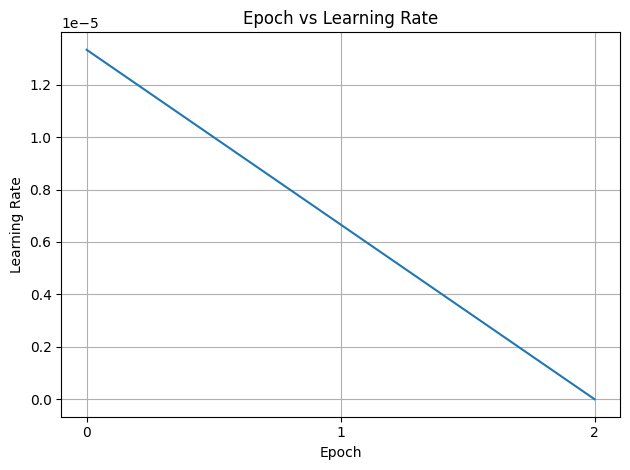

In [36]:
train_df = pd.read_csv(os.path.join(data_dir, 'train-epoch-learning-rate.csv'))
plt.plot(train_df['Step'], train_df['Value'])
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Epoch vs Learning Rate')
plt.xticks(range(0,3))
plt.grid()
plt.tight_layout()
plt.savefig(os.path.join('Figures', 'epoch-vs-lr.png'), dpi=500)
plt.plot()

---
# Epoch Loss

[]

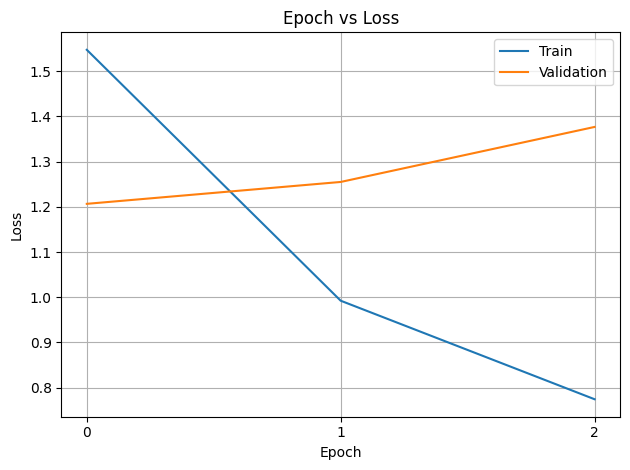

In [56]:
train_df = pd.read_csv(os.path.join(data_dir, 'train-epoch-loss.csv'))
val_df = pd.read_csv(os.path.join(data_dir, 'validation-epoch-loss.csv'))
plt.plot(train_df['Step'], train_df['Value'], label='Train')
plt.plot(val_df['Step'], val_df['Value'], label='Validation')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.xticks(range(0,3))
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig(os.path.join('Figures', 'epoch-vs-loss.png'), dpi=500)
plt.plot()

---
# Epoch Start and End Logits Accuracy

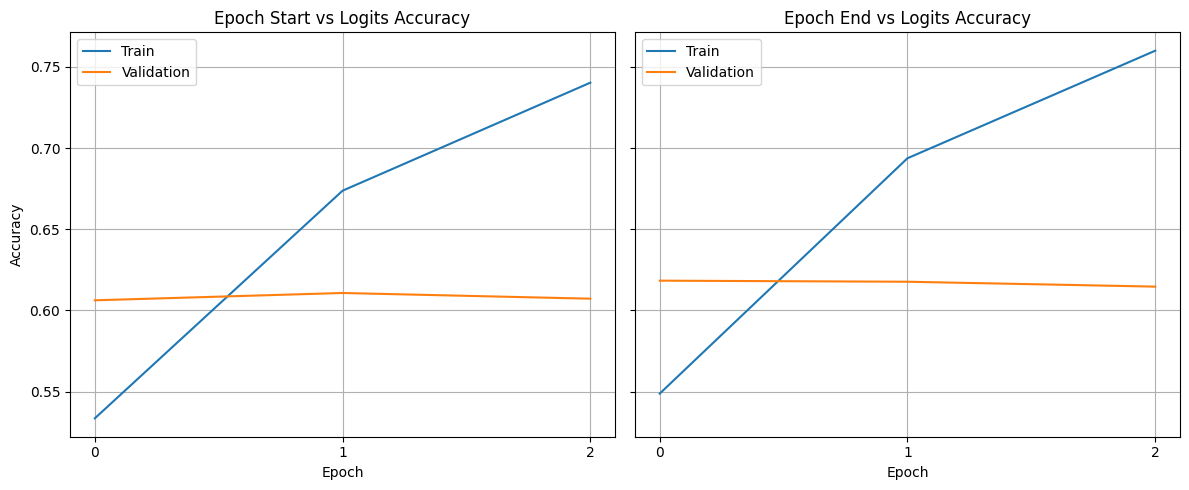

In [53]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(12,5))

train_df = pd.read_csv(os.path.join(data_dir, 'train-epoch-start-logits-accuracy.csv'))
val_df = pd.read_csv(os.path.join(data_dir, 'validation-epoch-start-logits-accuracy.csv'))
ax1.plot(train_df['Step'], train_df['Value'], label='Train')
ax1.plot(val_df['Step'], val_df['Value'], label='Validation')
ax1.legend()
ax1.grid()
ax1.set_xticks(range(0,3))

ax1.set_title('Epoch Start vs Logits Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')

train_df = pd.read_csv(os.path.join(data_dir, 'train-epoch-end-logits-accuracy.csv'))
val_df = pd.read_csv(os.path.join(data_dir, 'validation-epoch-end-logits-accuracy.csv'))
ax2.plot(train_df['Step'], train_df['Value'], label='Train')
ax2.plot(val_df['Step'], val_df['Value'], label='Validation')
ax2.set_xticks(range(0,3))

ax2.legend()
ax2.grid()
ax2.set_title('Epoch End vs Logits Accuracy')

ax2.set_xlabel('Epoch')
plt.tight_layout()
plt.savefig(os.path.join('Figures', 'epoch-vs-accuracy.png'), dpi=500)
plt.show()

---
# Making LR and Loss more concise

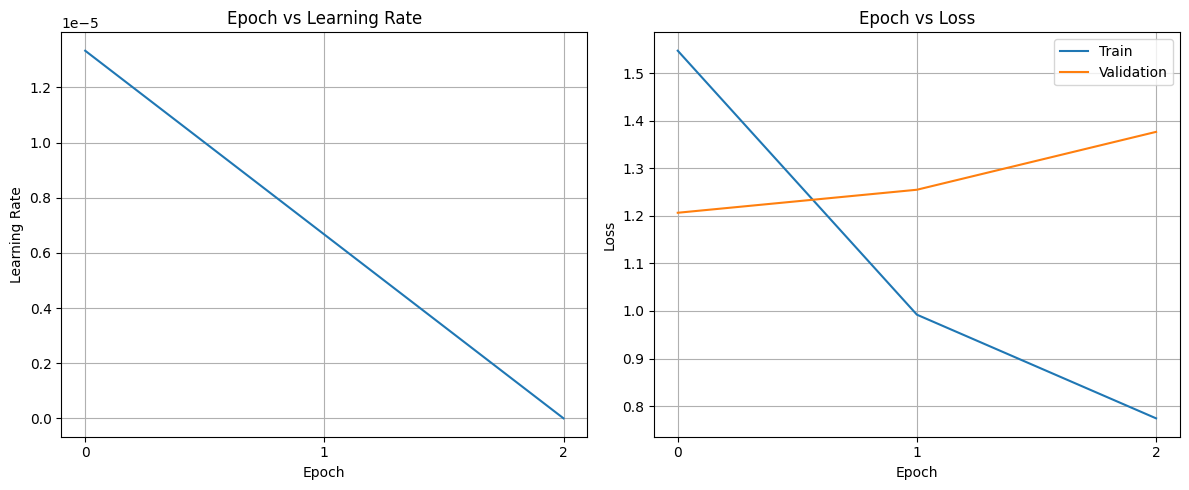

In [55]:
fig, (ax1, ax2) = plt.subplots(1,2 , figsize=(12,5))

train_df = pd.read_csv(os.path.join(data_dir, 'train-epoch-learning-rate.csv'))
ax1.plot(train_df['Step'], train_df['Value'])
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Learning Rate')
ax1.set_title('Epoch vs Learning Rate')
ax1.set_xticks(range(0,3))
ax1.grid()
# plt.tight_layout()
# plt.savefig(os.path.join('Figures', 'epoch-vs-lr.png'), dpi=500)
# plt.plot()

train_df = pd.read_csv(os.path.join(data_dir, 'train-epoch-loss.csv'))
val_df = pd.read_csv(os.path.join(data_dir, 'validation-epoch-loss.csv'))
ax2.plot(train_df['Step'], train_df['Value'], label='Train')
ax2.plot(val_df['Step'], val_df['Value'], label='Validation')

ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_title('Epoch vs Loss')
ax2.set_xticks(range(0,3))
ax2.legend()
ax2.grid()
# plt.tight_layout()
# plt.savefig(os.path.join('Figures', 'epoch-vs-loss.png'), dpi=500)
# plt.plot()

plt.tight_layout()
plt.savefig(os.path.join('Figures', 'lr-loss-combines.png'), dpi=500)
plt.show()

---
# Visualizing text output

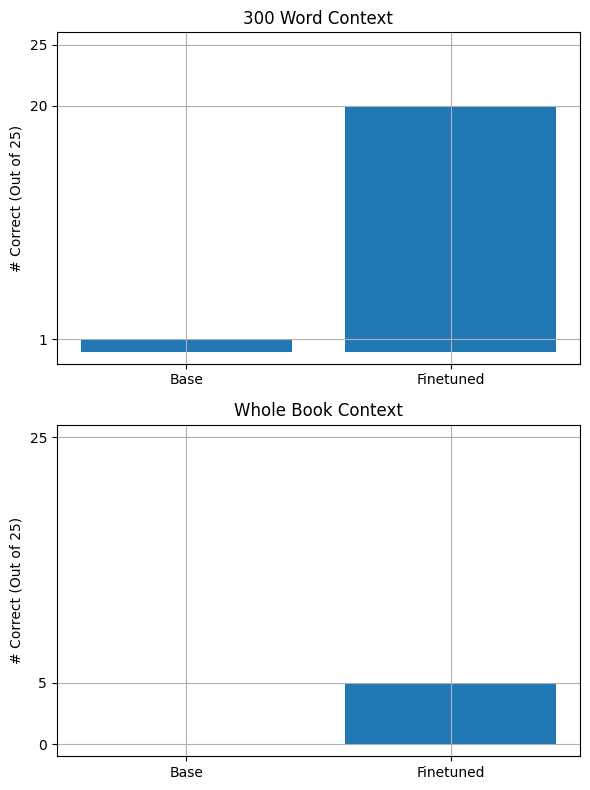

In [95]:

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6,8))

# 1 if correct, 0 otherwise
base = np.array([
    0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
])
finetuned = np.array([
    1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,
])
ax1.bar(x=['Base', 'Finetuned'], height=[sum(base), sum(finetuned)])
ax1.set_ylabel('# Correct (Out of 25)')
ax1.set_ylim([-1,26])
ax1.set_yticks([sum(base), sum(finetuned), 25] )
ax1.grid()
ax1.set_title('300 Word Context')

base = np.array([
    0
])
finetuned = np.array([
    1,1,1,1,1
])
ax2.bar(x=['Base', 'Finetuned'], height=[sum(base), sum(finetuned)])
ax2.set_yticks([sum(base), sum(finetuned), 25] )
ax2.set_ylim([-1,26])
ax2.set_title('Whole Book Context')
ax2.set_ylabel('# Correct (Out of 25)')

ax2.grid()
plt.tight_layout()
plt.savefig(os.path.join('Figures','num-correct-vert.png'), dpi=500)
plt.show()

In [ ]:
p